In [ ]:
!gdown https://drive.google.com/uc?id=1WsLkQKdcj2yZblcLbo9o5zVWMkq7G8A8

Downloading...
From (original): https://drive.google.com/uc?id=1WsLkQKdcj2yZblcLbo9o5zVWMkq7G8A8
From (redirected): https://drive.google.com/uc?id=1WsLkQKdcj2yZblcLbo9o5zVWMkq7G8A8&confirm=t&uuid=8374980f-53de-4f36-806c-36743c1c4390
To: /content/chessData.csv.zip
100% 151M/151M [00:00<00:00, 155MB/s]


In [ ]:
!unzip -q chessData.csv.zip

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
my_data_df = pd.read_csv('chessData.csv')

In [ ]:
def fen_to_one_hot(fen_string):
    piece_to_index = {'P': 0, 'N': 1, 'B': 2, 'R': 3, 'Q': 4, 'K': 5,
                      'p': 6, 'n': 7, 'b': 8, 'r': 9, 'q': 10, 'k': 11}

    # Create an empty numpy array with shape (8, 8, 12)
    chessboard = np.zeros((8, 8, 12), dtype=int)

    # Split the FEN string into its components
    fen_parts = fen_string.split(' ')
    board_part = fen_parts[0]

    # Convert the FEN board string to a numpy array
    row = 0
    col = 0
    for char in board_part:
        if char == '/':
            row += 1
            col = 0
        elif char.isdigit():
            col += int(char)
        else:
            piece_index = piece_to_index[char]
            chessboard[row, col, piece_index] = 1
            col += 1

    return chessboard

def parse_advantage(advantage_str):
    if advantage_str.startswith('#+'):
        return 99999
    elif advantage_str.startswith('#-'):
        return -99999
    else:
        # Parse numeric advantage
        return int(advantage_str.lstrip('\ufeff'))

def parse_turn(player_turn_string):
    return np.array([1, 0]) if player_turn_string == "w" else np.array([0, 1])

def parse_castle(castle_string):
    piece_to_index = {'K': 0, 'Q': 1, 'k': 2, 'q': 3}
    castle_array = np.zeros(4, dtype=int)
    for c in castle_string:
        try:
            castle_array[piece_to_index[c]] = 1
        except KeyError:
            pass
    return castle_array

def parse_en_passant(en_passant_string):
    en_passent_array = np.zeros((8, 8), dtype=int)
    if en_passant_string != "-":
        row = int(en_passant_string[1]) - 1
        col = ord(en_passant_string[0]) - ord('a')
        en_passent_array[row, col] = 1
    return en_passent_array

# print(fen_to_one_hot('rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'))
# print(parse_advantage('#+1'))
# print(parse_advantage('#-1'))
# print(parse_advantage('+1'))
# print(parse_advantage('-1'))
# print(parse_turn('w'))
# print(parse_turn('b'))
# print(parse_castle('KQkq'))
# print(parse_castle('-'))
# print(parse_en_passant('e4'))
# print(parse_en_passant('-'))

[[[0 0 0 0 0 0 0 0 0 1 0 0]
  [0 0 0 0 0 0 0 1 0 0 0 0]
  [0 0 0 0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 1 0]
  [0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0 1 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 1 0 0]]

 [[0 0 0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0

In [ ]:
train_positions = 100000
test_positions = 100

X_board = []
X_active_color = []
X_castling_rights = []
X_en_passant = []
X_half_turn = []
y = []

X_board_test = []
X_active_color_test = []
X_castling_rights_test = []
X_en_passant_test = []
X_half_turn_test = []
y_test = []

rows_evaluated = 0

my_data_df = my_data_df.sample(frac=1)

for _, row in my_data_df.iterrows():
    fen, eval = row['FEN'], row['Evaluation']
    if eval[0] == '#':
        continue
    board, active_color, castling, en_passant, halfmove, fullmove = fen.split(' ')
    if rows_evaluated < train_positions:
        X_board.append(fen_to_one_hot(board).flatten())
        X_active_color.append(parse_turn(active_color))
        X_castling_rights.append(parse_castle(castling))
        X_en_passant.append(parse_en_passant(en_passant).flatten())
        X_half_turn.append(np.array([int(halfmove)]))
        y.append(parse_advantage(eval))
    elif rows_evaluated < train_positions + test_positions:
        X_board_test.append(fen_to_one_hot(board).flatten())
        X_active_color_test.append(parse_turn(active_color))
        X_castling_rights_test.append(parse_castle(castling))
        X_en_passant_test.append(parse_en_passant(en_passant).flatten())
        X_half_turn_test.append(np.array([max(0, min(1, int(halfmove) / 50))]))
        y_test.append(parse_advantage(eval))
    else:
        break
    rows_evaluated += 1;

In [ ]:
X_board = np.array(X_board)
X_active_color = np.array(X_active_color)
X_castling_rights = np.array(X_castling_rights)
X_en_passant = np.array(X_en_passant)
X_half_turn = np.array(X_half_turn)
y = np.array(y)
X_board_test = np.array(X_board_test)
X_active_color_test = np.array(X_active_color_test)
X_castling_rights_test = np.array(X_castling_rights_test)
X_en_passant_test = np.array(X_en_passant_test)
X_half_turn_test = np.array(X_half_turn_test)
y_test = np.array(y_test)

In [ ]:
board_input = tf.keras.layers.Input(shape=(8, 8, 12), name='board_input')
board_input = tf.keras.layers.Reshape((768,))(board_input)
active_color_input = tf.keras.layers.Input(shape=(2,), name='active_color_input')
castling_rights_input = tf.keras.layers.Input(shape=(4,), name='castling_rights_input')
en_passant_input = tf.keras.layers.Input(shape=(8, 8), name='en_passant_input')
en_passant_input = tf.keras.layers.Reshape((64,))(en_passant_input)
half_turn_input = tf.keras.layers.Input(shape=(1,), name='half_turn_input')

board_input = tf.keras.layers.Flatten()(board_input)
active_color_input = tf.keras.layers.Flatten()(active_color_input)
castling_rights_input = tf.keras.layers.Flatten()(castling_rights_input)
en_passant_input = tf.keras.layers.Flatten()(en_passant_input)
half_turn_input = tf.keras.layers.Flatten()(half_turn_input)

concatenated_inputs = tf.keras.layers.Concatenate()([board_input, active_color_input, castling_rights_input, en_passant_input, half_turn_input])

hidden_layer1 = tf.keras.layers.Dense(64, activation='relu')(concatenated_inputs)
hidden_layer2 = tf.keras.layers.Dense(32, activation='relu')(hidden_layer1)
hidden_layer3 = tf.keras.layers.Dense(16, activation='relu')(hidden_layer2)
hidden_layer4 = tf.keras.layers.Dense(8, activation='relu')(hidden_layer3)
hidden_layer5 = tf.keras.layers.Dense(4, activation='relu')(hidden_layer4)
hidden_layer6 = tf.keras.layers.Dense(2, activation='relu')(hidden_layer5)

output_layer = tf.keras.layers.Dense(1, activation='linear')(hidden_layer6)

model = tf.keras.Model(inputs=[board_input, active_color_input, castling_rights_input, en_passant_input, half_turn_input], outputs=output_layer)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 768)]                0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 input_9 (InputLayer)        [(None, 64)]                 0         []                            
                                                                                            

In [ ]:
history = model.fit(
    [X_board, X_active_color, X_castling_rights, X_en_passant, X_half_turn],
    y,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
2500/2500 [==============================] - 18s 7ms/step - loss: 626640.8125 - mae: 303.4874 - val_loss: 570524.1875 - val_mae: 305.4933
Epoch 2/10
2500/2500 [==============================] - 11s 4ms/step - loss: 561102.6250 - mae: 303.1610 - val_loss: 545380.1875 - val_mae: 304.6456
Epoch 3/10
2500/2500 [==============================] - 15s 6ms/step - loss: 524944.2500 - mae: 301.0512 - val_loss: 538254.8750 - val_mae: 302.3903
Epoch 4/10
2500/2500 [==============================] - 12s 5ms/step - loss: 497782.8438 - mae: 297.6638 - val_loss: 535035.2500 - val_mae: 304.7158
Epoch 5/10
2500/2500 [==============================] - 13s 5ms/step - loss: 471185.4062 - mae: 292.1586 - val_loss: 541685.8750 - val_mae: 303.5555
Epoch 6/10
2500/2500 [==============================] - 15s 6ms/step - loss: 442184.0312 - mae: 285.1635 - val_loss: 550202.7500 - val_mae: 309.3410
Epoch 7/10
2500/2500 [==============================] - 19s 7ms/step - loss: 406754.3125 - mae: 278.0598 -

In [ ]:
model.evaluate(
    [X_board_test, X_active_color_test, X_castling_rights_test, X_en_passant_test, X_half_turn_test],
    y_test
)

4/4 [==============================] - 0s 7ms/step - loss: 340429.0938 - mae: 243.1066


[340429.09375, 243.10662841796875]

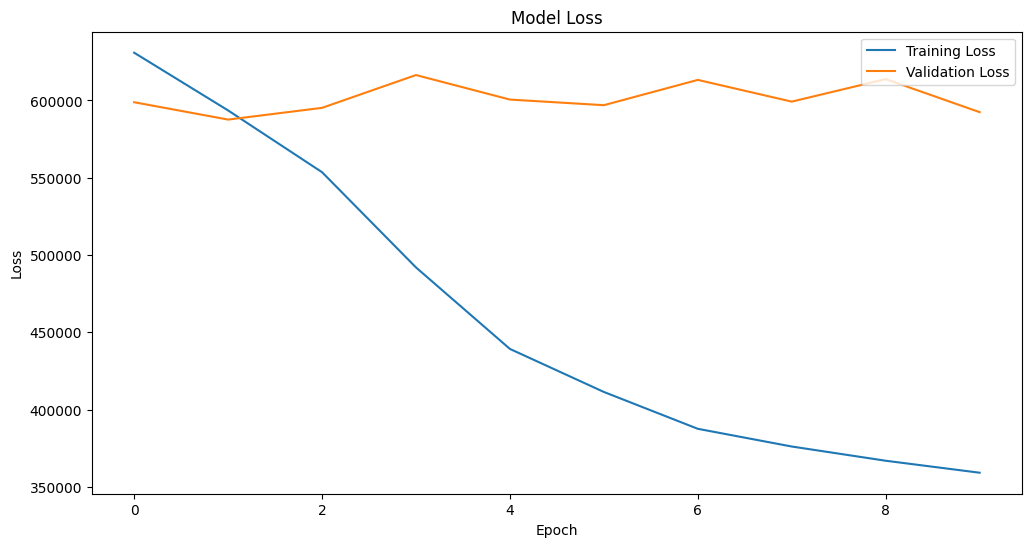

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models
# import matplotlib.pyplot as plt
# (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# train_images, test_images = train_images / 255.0, test_images / 255.0
# print(len(train_images))
# print(len(train_images[0]))
# print(len(train_images[0][0]))
# print(len(train_images[0][0][0]))
# print(train_images[0])
# model = models.Sequential([
#     # Convolutional and pooling layers
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),

#     # Fully connected layers
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(10)  # Output layer with 10 classes
# ])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# history = model.fit(train_images, train_labels, epochs=10,
#                     validation_data=(test_images, test_labels))
# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
# print("\nTest accuracy:", test_acc)
# plt.figure(figsize=(10, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Training and Validation Loss')

# plt.show()

50000
32
32
3
[[[1.99026097e-25 2.09146068e-25 2.12519392e-25]
  [1.45052918e-25 1.55172889e-25 1.51799566e-25]
  [1.68666184e-25 1.61919537e-25 1.45052918e-25]
  ...
  [5.32985142e-25 4.45278726e-25 3.64318958e-25]
  [5.12745200e-25 4.21665460e-25 3.44079016e-25]
  [4.99251905e-25 4.18292137e-25 3.47452339e-25]]

 [[5.39731789e-26 6.74664736e-26 6.74664736e-26]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [6.07198263e-26 2.69865895e-26 0.00000000e+00]
  ...
  [4.14918813e-25 2.96852484e-25 1.85532803e-25]
  [4.01425518e-25 2.79985866e-25 1.68666184e-25]
  [4.11545489e-25 2.93479160e-25 1.92279450e-25]]

 [[8.43330920e-26 8.09597684e-26 7.08397973e-26]
  [5.39731789e-26 2.36132658e-26 0.00000000e+00]
  [1.65292860e-25 9.10797394e-26 2.69865895e-26]
  ...
  [3.98052194e-25 2.83359189e-25 1.68666184e-25]
  [4.04798842e-25 2.83359189e-25 1.68666184e-25]
  [3.67692281e-25 2.46252629e-25 1.41679595e-25]]

 ...

 [[7.01651326e-25 5.73465026e-25 3.23839073e-25]
  [6.78038060e-25 5.16118